In [1]:
import pandas as pd
from modules import data
from modules import metrics
from modules import valuation
from modules import visualisation

In [13]:
# define parameters
CURRENT_PRICE = 39.61
BETA = 1.79

CAP_GROWTH = 1.15
MARKET_RETURN = 0.1
RISK_FREE_RETURN = 0.035

In [14]:
#get data
df = data.get_data()

In [15]:
df.columns

Index(['year', 'Revenue', 'Interest_Expense_(Operating)', 'EBT',
       'Income_Tax_Provision', 'Net_Income_Common', 'EPS_(Diluted)',
       'Shares_(Diluted,_Weighted)', 'Gross_Margin', 'Net_Profit_Margin',
       'Free_Cash_Flow_Margin', 'Operating_Cash_Flow_Margin',
       'Cash_and_Short_Term_Investments', 'Total_current_assets',
       'Total_non-current_assets', 'Total_Assets', 'Total_current_liabilities',
       'Total_non-current_liabilities', 'Total_liabilities',
       'Shareholders_Equity_(Total)', 'Total_Debt', 'Operating_Cash_Flow',
       'Investing_cash_flow', 'Equity_Repurchase_(Common,_Net)',
       'Dividends_Paid_(Total)', 'Financing_cash_flow',
       'Stock_Based_Compensation', 'P/E_ratio', 'P/FCF_ratio',
       'P/Operating_CF', 'P/B_ratio', 'Current_Ratio', 'Debt/Assets',
       'Debt/Equity', 'Interest_Coverage', 'ROE', 'ROA', 'ROIC',
       'Book_value_per_Share', 'Free_Cash_Flow', 'dividend_per_share',
       'payout_ratio'],
      dtype='object', name='Unname

# profitability

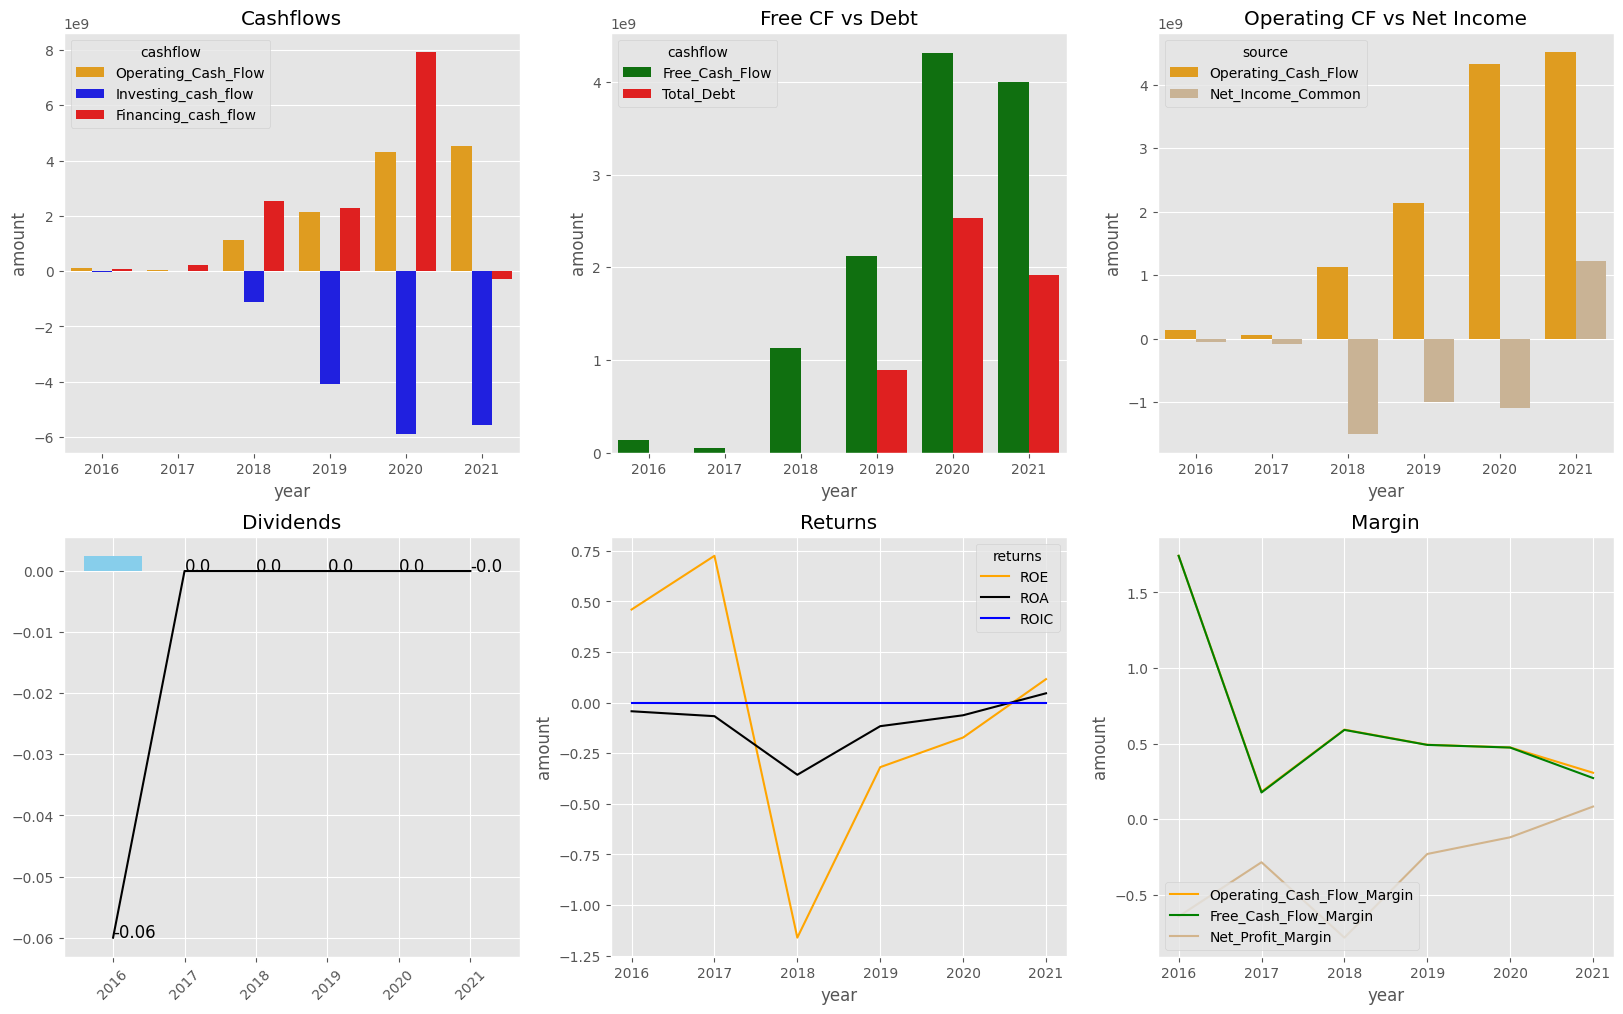

In [16]:
visualisation.visualise_profitability(df)

In [6]:
# df = df.iloc[1:]

In [7]:
#get metrics
SHARE_COUNT = metrics.shares(df)
WACC = metrics.wacc(df,
                     CURRENT_PRICE,
                     market_return_rate=MARKET_RETURN,
                     risk_free_rate=RISK_FREE_RETURN, 
                     beta=BETA)


# get past 4 years performance history

In [8]:
OCF_History = list(df.iloc[:4]["Operating_Cash_Flow"])
Net_Income_History = list(df.iloc[:4]["Net_Income_Common"])
FCF_History = list(df.iloc[:4]["Free_Cash_Flow"])
Dividends_History = list(df.iloc[:4]["dividend_per_share"])

In [9]:
# Net_Income_History[-1] = 0.01

# Valuations

### Operating cash flow

In [10]:
OCF_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=OCF_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

OCF_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=OCF_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)

In [11]:
print(f"""Value based on YOY OCF projection: {OCF_YOY_GROWTH}
Value based on CAGR OCF projection: {OCF_CAGR_GROWTH}""")

Value based on YOY OCF projection: 60.504305558311955
Value based on CAGR OCF projection: 48.981256891652386


### Net income

In [12]:
NI_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=Net_Income_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

NI_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=Net_Income_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)

In [13]:
print(f"""Value based on YOY Net Income projection: {NI_YOY_GROWTH}
Value based on CAGR Net Income projection: {NI_CAGR_GROWTH}""")

Value based on YOY Net Income projection: 27.299617499251696
Value based on CAGR Net Income projection: 14.56465462870969


### FCF 

In [14]:
FCF_YOY_GROWTH = valuation.get_ave_yoy_growth_DCF_value(history=FCF_History,
                                       cap_growth=CAP_GROWTH, 
                                       wacc=WACC, 
                                       no_of_shares=SHARE_COUNT)

FCF_CAGR_GROWTH = valuation.get_cagr_growth_DCF_value(history=FCF_History,
                                    cap_growth=CAP_GROWTH, 
                                    wacc=WACC, 
                                    no_of_shares=SHARE_COUNT)
FCF_PERPETUAL = valuation.perpetual_FCF_growth_valuation(history = FCF_History, 
                                                        wacc=WACC, 
                                                        no_of_shares=SHARE_COUNT)

In [15]:
print(f"""Value based on YOY FCF projection: {FCF_YOY_GROWTH}
Value based on CAGR FCF projection: {FCF_CAGR_GROWTH}
Value based on perpetual growth projectionL {FCF_PERPETUAL}""")

Value based on YOY FCF projection: 43.379197668433555
Value based on CAGR FCF projection: 26.88160244198152
Value based on perpetual growth projectionL 51.0979084271762


In [16]:
### Dividends

In [17]:
try:
    DIVIDENDS_PERPETUAL = valuation.perpetual_dividend_growth_valuation(history = Dividends_History, 
                                                        wacc=WACC)
except ZeroDivisionError:
    DIVIDENDS_PERPETUAL = 0

In [18]:
print(f"Value based on perpetual dividends growth projection: {DIVIDENDS_PERPETUAL}")

Value based on perpetual dividends growth projection: 0


# troubleshoot

In [19]:
print(f"debt weightage: {metrics.debt_weight(df, current_share_price=CURRENT_PRICE)}")
print(f"debt cost: {metrics.debt_cost(df)}")
print(f"debt cost: {metrics.debt_cost(df)}")
print("\n")
print(f"equity weightage: {metrics.equity_weight(df, current_share_price=CURRENT_PRICE)}")
print(f"equity cost: {metrics.equity_cost(market_return_rate=MARKET_RETURN,risk_free_rate=RISK_FREE_RETURN,beta=BETA)}")


debt weightage: 0.06354735541080477
debt cost: 0.03410935993485222
debt cost: 0.03410935993485222


equity weightage: 0.9364526445891952
equity cost: 0.1039


In [20]:
OCF_History

[22116602809.7063, 34110939510.9395, 26146709677.4194, 22472484076.4331]

In [21]:
df[["Net_Profit_Margin","Operating_Cash_Flow_Margin","Free_Cash_Flow_Margin"]]


Unnamed: 0,Net_Profit_Margin,Operating_Cash_Flow_Margin,Free_Cash_Flow_Margin
0,0.0726,0.1644,0.1018
1,0.2095,0.3116,0.2519
2,0.2928,0.3632,0.2990
3,0.2325,0.4002,0.2685
4,0.2557,0.4709,0.3517
5,0.2759,0.5075,0.3967
6,0.7066,0.5620,0.4547
7,0.3169,0.5409,0.4398
8,0.4396,0.5024,0.4114
9,0.2435,0.4194,0.3557
